# Exercise 2 - Image Classification with ML and DL

In this exercise you and your team have to finish the implementation of the following machine learning code.  

This exercise consists of the following steps which have to work in conjunction:
* Data visualization - Visualize the data to become familiar with it and identify possible patterns and problems
* Data preparation - Prepare the data for it to be usable later in the machine learning model
* Model creation - Chose/build a machine learning model suitable for the given task
* Model training - Train your model with the data you prepared
* Model evaluation - Evaluate the performance of your model. For this choose appropriate measurement metrics and visualize it with the help of graphs and figures

---

**You will find tasks all throughout this notebook. The start and the end of a task is marked through parting lines as in between these lines you can add as many code cells as you need to finish the task and to add your documentation.**

---

## Part 1 - Classical Machine Learning Algorithms

### Important imports

In [67]:
# Imports the NumPy library, which is used for numerical operations and arrays.
import numpy as np
# Imports the pyplot part of Matplotlib, used for creating plots and showing images.
import matplotlib.pyplot as plt
# Imports the Scikit-learn library, which has many machine learning tools.
import sklearn
# Imports the 'os' library, used for interacting with the operating system (like listing files).
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Hides INFO and WARNING messages, but shows ERROR and FATAL. It suppresses NUMA Warning (Task 7)
# Imports the 'pathlib' library, which helps create and manage file system paths.
import pathlib

### Inspect the data 

The first step of every machine learning project is to make oneself familiar with the data.  

* In what form is the data accessible?

    * **The data is accessible as individual image files on our file system. These files are organized into a main directory (data/CIFAR-10-images/) which is then split into train and test subdirectories.**

* How many samples are there?

    * **50,000 training samples**

    * **10,000 test samples This gives a total of 60,000 images, which is standard for the CIFAR-10 dataset.**

* Are they already sorted by class?

    * **Yes. Inside both the train and test directories, the images are further sorted into subfolders. Each subfolder's name is the class label for all the images it contains (e.g., 'airplane', 'cat', 'dog').**

* etc.

It is important to look through them programmatically and manually to see if maybe some prior preparation is needed before even loading the data.

You can use the following code to check, if your dataset is in the right place (data/CIFAR-10-images/)

In [56]:
# Get information about the folder contents

# Loops through all folders, subfolders, and files starting from the main images directory.
for dirpath, dirnames, filenames in os.walk("data/CIFAR-10-images/"):
    
    # Prints a sentence counting the number of subfolders and files found in the current folder.
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/CIFAR-10-images/'.
There are 10 directories and 0 images in 'data/CIFAR-10-images/test'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/cat'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/dog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/truck'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/bird'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/airplane'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/ship'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/frog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/horse'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/deer'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/automobile'.
There are 10 directories and 0 images in 'data/CIFAR-10-images/train'.
There are 0 di

**Since each sample is already sorted into its own dictionary we don't have to do it ourselves and can take the folder names as names for our classes we want our model to be able to classify**

---

#### Task 01 - Generate Class Names

##### Use the Numpy *np.array()* to create a list of class names from the subdirectories!

Take a look here if you're stuck: https://numpy.org/doc/stable/

The output should look something like this:

`['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10`


In [57]:
# get class names from folders

# Creates a 'Path' object that points to our main training data folder.
data_dir = pathlib.Path("data/CIFAR-10-images/train/")  # turn our training path into a Python path

# Gets the names of all subfolders, sorts them alphabetically, and saves them in a NumPy array.
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.is_dir()])) # TODO: create a list of class_names from the subdirectories

# Prints the sorted array of class names and the total number of classes.
print(class_names, len(class_names))


# pathlib.Path() - Creates a path to our training folder
# data_dir.glob('*') - Gets all folders inside (one for each class)
# if item.is_dir(): Checks if the item is a directory
# item.name - Extracts folder names like "airplane", "cat", etc.
# sorted() - Puts names in alphabetical order
# np.array() - Converts to NumPy array

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10


#### Next, you need to associate class names with numbers.

The output should look something like this:
`(10,
 {'airplane': 0,
  'automobile': 1,
  'bird': 2,
  'cat': 3,
  'deer': 4,
  'dog': 5,
  'frog': 6,
  'horse': 7,
  'ship': 8,
  'truck': 9})`

In [58]:
# associate class names with numbers, machinelaerning and deeplearning works with numbers!

# Creates a dictionary (like a lookup table) that pairs each name with a unique number.
class_names_dict = {name: i for i, name in enumerate(class_names)} # TODO: create the dictionary

# Prints the total number of items in the dictionary (e.g., 10) and the dictionary itself.
len(class_names_dict), class_names_dict

# enumerate(class_names) - Creates pairs: (0, 'airplane'), (1, 'automobile'), etc.
# for i, name - Unpacks each pair into index and name variables
# name: i - Creates dictionary entries mapping names to numbers

(10,
 {'airplane': 0,
  'automobile': 1,
  'bird': 2,
  'cat': 3,
  'deer': 4,
  'dog': 5,
  'frog': 6,
  'horse': 7,
  'ship': 8,
  'truck': 9})

---

### Visualizing

After getting a feeling about the size and structure of our data on our hard drive, the next step is to visualize the data.  
In the case of image data this can be done by loading random images and plotting them. Also, just looking through them in their folders is a good idea.

In [5]:
# Import the 'random' library, which lets us pick random items.
import random
# Import 'mpimg' from the 'matplotlib' library to read image files.
import matplotlib.image as mpimg


# Define a function to show a random image, which needs a directory and class name.
def display_random_img(target_dir, target_class):
    
    # Create the full path to the specific class folder (e.g., "data/train/dog").
    target_folder = target_dir + target_class
    
    # Get a list of all files in the folder and randomly pick one filename.
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read the chosen image file and load its pixel data into the 'img' variable.
    img = mpimg.imread(target_folder + "/" + random_image[0])

    # Tell matplotlib to display the pixel data as an image.
    plt.imshow(img)
    
    # Set the image's title to be the name of its class (e.g., 'dog').
    plt.title(target_class)
    
    # Hide the numbered x and y axes on the plot.
    plt.axis("off");
    
    # Print the shape of the image (e.loc, 32 pixels high, 32 wide, 3 colors).
    print(f"Image shape: {img.shape}")

    # Send the loaded image array 'img' back out of the function.
    return img

**By running the code cell below we can look through random images and might be able to see out-liners or maybe even wrongly labeled images**

---

#### Task 02 - Displaying an image

##### Use the *display_random_img(target_dir, target_class)* function to display a random image with the corresponding label.

If done right, you should see the image below your function call.

Image shape: (32, 32, 3)


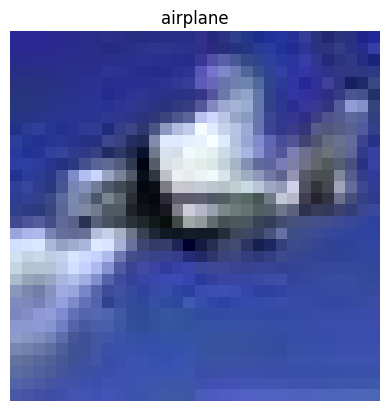

In [6]:
# Display a random image

# Sets a variable to the path of our training data folder.
train_dir_path = "data/CIFAR-10-images/train/"

# Picks one random class name (like 'dog' or 'cat') from our 'class_names' list.
random_class = random.choice(class_names)

# Calls our helper function to show a random image from the randomly chosen class.
img =  display_random_img(target_dir=train_dir_path, target_class=random_class) # TODO: Call display_random_img(target_dir, target_class) right here

Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)


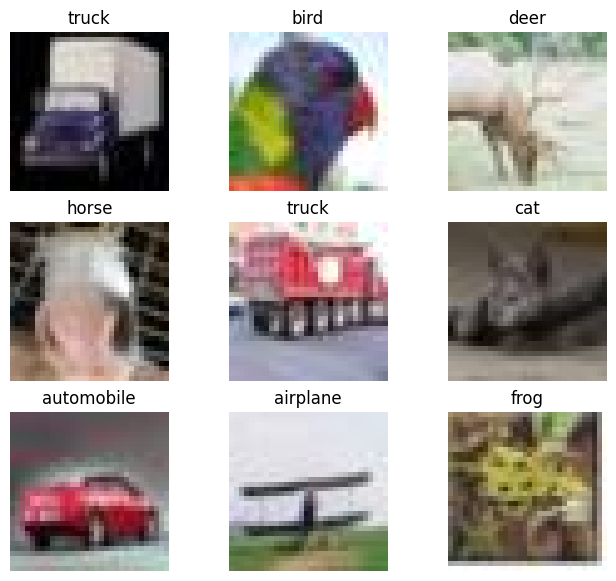

In [7]:
# Display multiple images from the data set

# Creates a blank window for our plot, setting its size to 8x7 inches.
plt.figure(figsize=(8, 7))

# Starts a loop that will run 9 times, once for each spot in our grid.
for i in range(9):

    # Creates a new small plot in a 3x3 grid at the current position 'i+1'.
    plt.subplot(3, 3, i + 1)
    
    # We pick a new random class *each time* inside the loop
    # Calls our helper function to show a random image from a random class.
    img = display_random_img(target_dir=train_dir_path,
                             target_class=random.choice(class_names)) # TODO: Call display_random_img(...)
                             
    # Hides the numbered axes on the current small plot.
    plt.axis(False)

**An images representation is nothing else than a array of the pixel values. These values are usually between 0 and 255 and depending on the value the pixel is brighter or darker. By overlaying the 3 color channels red, green, blue (RGB) the colored images we know are created**

In [8]:
# TODO: Display image as array
# This will print the raw pixel values (numbers from 0-255)
print(img)

# This output shows the raw color codes for the image's pixels.
# Each [R, G, B] group (like [ 69  83  22]) is the color of one single pixel.
# The output is arranged in rows, starting from the top-left corner.
# The '...' means it's skipping the middle and just showing the corners of the 32x32 image.


[[[164 146 110]
  [148 129  96]
  [150 129  98]
  ...
  [ 67  66  64]
  [131 130 126]
  [254 255 250]]

 [[141 122  89]
  [118  99  67]
  [126 105  76]
  ...
  [ 56  52  49]
  [129 128 124]
  [252 253 248]]

 [[134 115  85]
  [102  82  55]
  [101  79  55]
  ...
  [ 45  37  35]
  [132 128 125]
  [255 254 249]]

 ...

 [[ 55  58  51]
  [ 50  53  46]
  [ 67  68  62]
  ...
  [ 86  83  74]
  [156 153 148]
  [247 243 240]]

 [[164 166 165]
  [169 171 170]
  [173 175 174]
  ...
  [175 177 172]
  [210 212 211]
  [252 253 255]]

 [[252 253 255]
  [254 255 255]
  [254 255 255]
  ...
  [248 252 251]
  [250 255 255]
  [247 252 255]]]


**The image shape is (32, 32, 3) this means the width and the height of the image consists of 32 pixels and 3 color channels**

In [9]:
# TODO: Display image shape (Remember, the image datatype should be a Numpy Array -> https://numpy.org/doc/stable/reference/generated/numpy.shape.html)
print(img.shape)

# This will print (32, 32, 3), meaning 32 pixels high, 32 pixels wide, and 3 color channels (RGB)

(32, 32, 3)


---

### Generate dataset out of CIFAR-10 images

Now that we got familiar with our data it is time to create a data set with which we can train our machine learning algorithm.
Since the folder structure is split into train and test we will also only generate a training and test set.

#### Loading data from the file system and generating training and test sets

To load the images from the file system we need to walk through the folders and add the images (normalized) to an array as well as the corresponding labels. Also, for the machine learning algorithms to work with these arrays we need to convert them to numpy arrays

---

#### Task 03 - Load images as features and labels  

##### Finish the function to load the images and their corresponding labels and return them as numpy arrays
* loop through the directory with os.walk https://www.geeksforgeeks.org/os-walk-python/
* create a filepath for each file
* and load each file with mpimg.imread https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html
* normalize each image https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-8-why-should-we-normalize-image-pixel-values-or-divide-by-255-4608ac5cd26a
* do not forget the labels
* return them as a numpy array

In [10]:
# This function's main goal is to load image files from our computer's folders 
# and convert them into a format that a machine learning model can understand.

def load_images_as_features_and_labels(target_dir, class_name_dictionary):
    """
    Returns:
    X -- images as numpy array with shape (num_images, 32, 32, 3)
    y -- labels as numpy array with shape (num_images,)
    """
    
    # Create empty lists to store images and labels temporarily
    X_list = []
    y_list = []
    
    # Walk through all folders and subfolders in target_dir
    for dirpath, dirnames, filenames in os.walk(target_dir):
        
        # Skip folders that don't contain image files
        if not filenames:
            continue
            
        # Extract class name from folder path (e.g., 'cat', 'dog')
        class_name = os.path.basename(dirpath)
        
        # Skip if this folder name is not in our class dictionary
        if class_name not in class_name_dictionary:
            continue
        
        # Get the numeric label for this class (e.g., 'cat' -> 3)
        label = class_name_dictionary[class_name]
        
        # Loop through each image file in this class folder
        for file in filenames:
            # Build complete file path (e.g., 'data/CIFAR-10-images/train/cat/1000.png')
            filepath = os.path.join(dirpath, file)
            
            # Load image as array with shape (32, 32, 3) and pixel values 0-255
            img = mpimg.imread(filepath)
            
            # Normalize pixel values from [0, 255] to [0.0, 1.0] for better ML training
            img_normalized = img / 255.0
            
            # Add normalized image to features list
            X_list.append(img_normalized)
            
            # Add corresponding label to labels list
            y_list.append(label)
    
    # Convert list of images to NumPy array - shape: (50000, 32, 32, 3)
    X = np.array(X_list)
    
    # Convert list of labels to NumPy array - shape: (50000,)
    y = np.array(y_list)
    
    return X, y

With help of the function above we can now load the images and there labels as a training and test set (this could take a while, depending on your hardware!)

In [ ]:
X_train, y_train = load_images_as_features_and_labels('data/CIFAR-10-images/train/', class_names_dict)
X_test, y_test = load_images_as_features_and_labels('data/CIFAR-10-images/test/', class_names_dict)

X_train, y_train, X_test, y_test

### Visualizing once again

After loading our data as training and test set it is once again important to visualize the loaded data. This way our understanding of our data grows, and we might notice errors we would not otherwise

First investigate the shape of our training and test set. One of the most common errors in ML is that the input shape for the algorithm is not compatible with the shape of our data

TODO: Print the shape of each data set. It should look like this `((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))`

In [17]:
# TODO: Add your code here
# Gets the .shape attribute from each NumPy array and prints them inside a tuple
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))


---

These shapes tell us the following:
* X_train is a four dimensional array
    - The first dimension tells us how many samples are in the array - 50000
    - The second dimension tells us how many pixel values the image has to represent its height - 32
    - The third dimension tells us how many pixel values the image has to represent its width - 32
    - The fourth dimension tells us how many color channels the image has (red ,green blue - RGB) - 3
* y_train is a one dimensional array containing the corresponding labels to X_train

Next we will visualize the actual images contained in our loaded data

In [23]:
# Define a function named 'print_multiple_figures' that accepts one argument (an array of images)
def print_multiple_figures(images_array):
    
    # Create a new blank plot window with a 9x9 inch size
    plt.figure(figsize=(9, 9))
    
    # Loop through the first 100 images (images_array[:100])
    # 'enumerate' gives us both the index (idx) and the image data (img)
    for idx, img in enumerate(images_array[:100]):
        
        # Create a 10x10 grid of subplots and select the (idx + 1) position
        # (e.g., 1st image goes to spot 1, 2nd to spot 2, etc.)
        plt.subplot(10, 10, idx + 1)
        
        # Display the image (img) in the selected subplot
        # cmap="binary" is a colormap, but imshow will display the color image correctly
        plt.imshow(img, cmap="binary")
        
        # Hide the X and Y axes (the number ticks) for this subplot
        plt.axis("off")
        
    # Adjust the spacing between subplots to 0 (removes all white space)
    plt.subplots_adjust(wspace=0, hspace=0)
    
    # Show the complete plot window with the 10x10 grid
    plt.show()

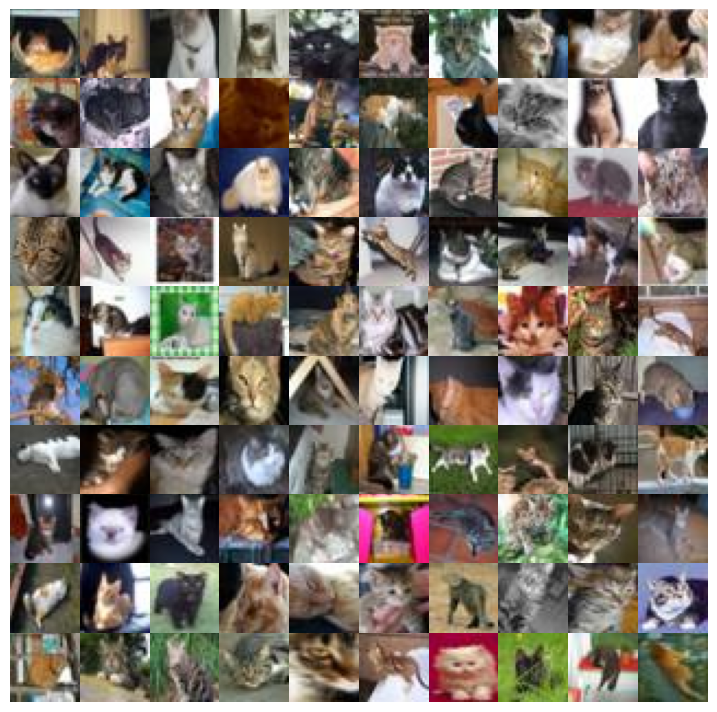

In [24]:
print_multiple_figures(X_train)

**By visualizing the train data we can see that the training set contains the images as we have loaded it. Meaning the data is sorted in order of the walked through folders**

## Training of our machine learning algorithm

We will use the random forest classifier algorithm to try and classify our test images.
For this we first need to once again prepare our data for the algorithm and then fit (train) it on our training data.

**Random forest classifier needs input in shape of (batch, flattened image) i.e (50000, 3072) -> 32*32*3  = 3072. This means we have to reshape or data**

---

#### TASK 04 - Reshaping your data set to make it compatible with the ML algorithm
##### Use numpys shape and reshape functions to reshape the data https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

It should look like this `((50000, 3072), (10000, 3072))`

In [25]:
# Random forest classifier needs input in shape of (batch, flattended image) i.e (50000, 3072) -> 32*32*3  = 3072
# ADD your code here

# Reshape X_train: from (50000, 32, 32, 3) to (50000, 3072)
# The '-1' tells NumPy to automatically calculate the second dimension (32*32*3 = 3072)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Reshape X_test: from (10000, 32, 32, 3) to (10000, 3072)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)


X_train_flattened.shape, X_test_flattened.shape

((50000, 3072), (10000, 3072))

---

After our data has the right shape we can fit/train a RandomForest Classifier on it

---

#### TASK 05 - load and train a RandomForestClassifier
##### use scikit-learns random forest classifier and use your data set to train it https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [26]:
%%time
from sklearn.ensemble import RandomForestClassifier

# TODO: load the classifier
# We instantiate the classifier.
# n_jobs=-1 tells scikit-learn to use all available CPU cores, which will speed up training significantly.
# random_state=42 makes the results reproducible (the model will be a bit different every time without it).
rnf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)

# TODO: train the classifier on the data set
# We 'fit' (train) the classifier using our flattened training images (X_train_flattened)
# and their corresponding correct labels (y_train).
# This step will take some time.
print("Starting model training...")
rnf_clf.fit(X_train_flattened, y_train)
print("Model training finished.")

Starting model training...
Model training finished.
CPU times: user 4min 4s, sys: 1.1 s, total: 4min 6s
Wall time: 35.2 s


With the classifier now trained on the training data we can make predictions with it

In [27]:
# TODO: Use the trained classifier to make predictions
# We use the trained classifier to predict the labels for the unseen test images.
print("Making predictions...")
y_pred_clf = rnf_clf.predict(X_test_flattened)
print("Predictions complete.")

Making predictions...
Predictions complete.


---

### Evaluation of the classifier

It is always important test our classifier. After all how should we know how well it performs?
To measure its performance multiple metrics can be used. The most important being:
* accuracy
* precision
* recall
* f1  

We can calculate it ourselves or import a function from scikit-learn to do it for us.
Now with our predictions and the test data we can evaluate the classifier

---

#### TASK 06 - Evaluate the classifier
##### Use the scikit learns score functions to evaluate accuracy, precision, recall and the f1 score and print the results

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# TODO: Add your code here

# --- Accuracy ---
# Compares the 10,000 model predictions (y_pred_clf) to the 10,000 correct answers (y_test).
# Answers the simple question: "Overall, what percentage of predictions were correct?"
accuracy = accuracy_score(y_test, y_pred_clf)


# --- Precision ---
# Answers: "When the model said an image was a 'dog', what percentage of the time was it actually a 'dog'?"
# High precision = The model's positive predictions are very reliable. Low false positives.
#
# We need 'average='weighted'' because this isn't a simple Yes/No problem (it's 10 classes).
# This calculates precision for 'cat', 'dog', 'ship', etc., separately,
# then combines them into one average score.
precision = precision_score(y_test, y_pred_clf, average='weighted')


# --- Recall ---
# Answers: "Of all the real 'dog' images in the dataset, what percentage did the model successfully find?"
# High recall = The model is great at finding all the real examples. Low false negatives.
#
# Again, 'average='weighted'' averages the recall score across all 10 classes.
recall = recall_score(y_test, y_pred_clf, average='weighted')


# --- F1-Score ---
# This is the "best of both worlds" score. It's a single number that
# tries to balance Precision and Recall.
# You want a high F1-Score if you care about *both* not being wrong (Precision)
# and not missing anything (Recall).
f1 = f1_score(y_test, y_pred_clf, average='weighted')


# --- Print the Results ---
# We multiply the scores (which are decimals like 0.45) by 100 to make them percentages.
# The ":.2f" part just formats the number to have two decimal places (e.g., 45.12%).
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (Weighted): {precision * 100:.2f}%")
print(f"Recall (Weighted): {recall * 100:.2f}%")
print(f"F1 Score (Weighted): {f1 * 100:.2f}%")

Accuracy: 46.47%
Precision (Weighted): 46.14%
Recall (Weighted): 46.47%
F1 Score (Weighted): 46.12%


---

### Viszalization of the evaluation

Another way to evaluate our classifier is by visualizing its performance.  
One way to do that is to use a confusion matrix.  
This matrix tells us how many samples were classified correctly and how many were falsely classified as a different class.
https://en.wikipedia.org/wiki/Confusion_matrix  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

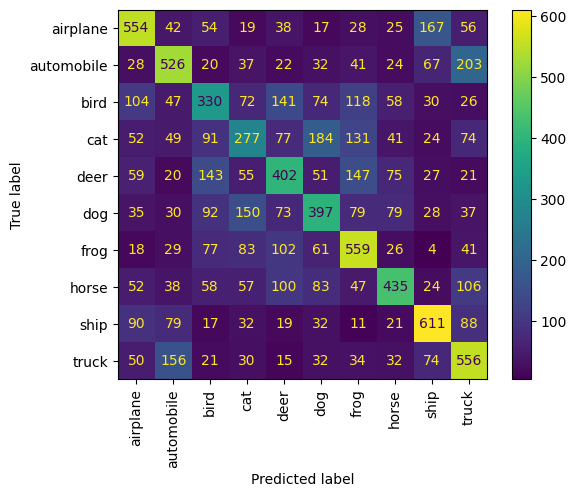

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

--------------------------------------------------------------

## Part 2 - Convolutional Neural Networks

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__  # IMPORTANT: This should print '2.8.0', if your version is newer, you might not be able to use your GPU for training!

'2.16.2'

If you have installed tensorflow with gpu support you should first of all be able to output your GPU.  
To install tensorflow with GPU support please follow the steps described here:  
https://www.tensorflow.org/install/pip

In [2]:
# Check if we're using a GPU
!nvidia-smi

zsh:1: command not found: nvidia-smi


Next to make sure tensorflow is able to detect your GPU get the device with `tf.config.list_physical_devices('GPU')`.  
And enable mixed precision if your GPU is good enough.
For more information about mixed precision look here:
https://www.tensorflow.org/guide/mixed_precision

In [4]:
# from tensorflow.keras import mixed_precision
#
# gpu_devices = tf.config.list_physical_devices('GPU')
# if gpu_devices:
#     details = tf.config.experimental.get_device_details(gpu_devices[0])
#     print(f"Your GPUs compute capability is {details['compute_capability'][:]}")
#     if details['compute_capability'][0] >= 7.0:
#         mixed_precision.set_global_policy('mixed_float16')
#         print(f"Your global policy has been set to: {mixed_precision.global_policy()}")
#     else:
#         print(
#             f"Your GPU does not support mixed precision, the global policy is left at: {mixed_precision.global_policy()}")
# else:
#     print("No GPU device could be found on your machine")

# --- M1 Mac (Apple Silicon) Compatible Code ---
# The original code was specific to NVIDIA GPUs, checking for 'compute capability'.
# This machine is an Apple M1 Mac, which uses an Apple GPU via the tensorflow-metal plugin.
# The code below is modified to correctly find and enable the M1 GPU.
# ---

from tensorflow.keras import mixed_precision

# This line checks for any physical GPU that TensorFlow can access.
# On this M1 Mac, this will find the 'Apple M1 Pro' GPU.
gpu_devices = tf.config.list_physical_devices('GPU')

if gpu_devices:
    print(f"Found GPU: {gpu_devices[0]}")

    # We can set the mixed precision policy directly without checking for compute capability
    # The 'tensorflow-metal' plugin for Apple GPUs supports 'mixed_float16',
    # which allows for faster training.
    mixed_precision.set_global_policy('mixed_float16')
    print(f"Your global policy has been set to: {mixed_precision.global_policy()}")
else:
    # This message will show if tensorflow-metal is not installed or the GPU is not found.
    print("No GPU device could be found on your machine")

Found GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Your global policy has been set to: <DTypePolicy "mixed_float16">


### Load images from directory with image_dataset_from_directory & create augmentation layer

This step describes how data can be loaded and how a CNN model can be trained.  
For more information and examples look here:  
https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory  
https://www.tensorflow.org/api_docs/python/tf/data/Dataset  
https://www.tensorflow.org/tutorials/load_data/images  
https://www.tensorflow.org/tutorials/images/data_augmentation  
https://www.tensorflow.org/guide/keras/preprocessing_layers

---

#### TASK 07 - Load your datasets for training and testing the DL model
##### Use the Tensorflow 'image_dataset_from_directory' method! (use shuffle = True on train_data!)

In [7]:
# --- Create Data Pipelines ---
# This code block uses TensorFlow's 'image_dataset_from_directory' function
# to efficiently load our image data. Instead of loading all images into RAM at once,
# it creates a pipeline that feeds the model small batches of data (64 images at a time)
# directly from the hard drive. It also shuffles the training data and formats the
# class labels into a 'categorical' (one-hot) format for the neural network.

train_dir = "data/CIFAR-10-images/train/"
test_dir = "data/CIFAR-10-images/test/"

BATCH_SIZE = 64

# TODO load the training set
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',  # Converts labels to one-hot encoding (e.g., 'bird' -> [0,0,1,0,0,0,0,0,0,0])
    image_size=(32, 32),       # Resizes all images to 32x32 (the original size of CIFAR-10)
    batch_size=BATCH_SIZE,     # Loads data in batches of 64 images
    shuffle=True               # Shuffles the training data, which is essential for good training
)

# TODO load the testing set
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',  # Must match the training data
    image_size=(32, 32),       # Must match the training data
    batch_size=BATCH_SIZE,     # Use the same batch size
    shuffle=False              # No need to shuffle test data; we just evaluate it in order
)

Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


---

In [8]:
# save the amount of classes we have - should be 10
num_classes = len(train_data.class_names)
print(f"Found {num_classes} classes: {train_data.class_names}")

Found 10 classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### CNN Architecture

* Sequential API - https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* Functional API - https://www.tensorflow.org/guide/keras/functional
* Subclassing - https://www.tensorflow.org/guide/keras/custom_layers_and_models


To use data augmentation inside our CNN model we first need to create a data augmentation "layer".  
For this we use the Sequential API and stack different preprocessing layers.  
The different layers and their options can be found in the documentation:  
https://www.tensorflow.org/guide/keras/preprocessing_layers

---

#### Task 08 - Build a sequential model with preprocessing layers
##### Use keras sequential API ( https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to stack preprocessing layers. Do not forget to normalize/rescale your data!

In [61]:
# Create a sequential model for data augmentation
# This will be added as a layer in the main model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

# Build augmentation pipeline to increase training data variety
data_augmentation = Sequential([
    RandomFlip("horizontal"),   # Randomly flip images left-to-right (mirror)
    RandomRotation(0.1),        # Randomly rotate images by ±10% (±36 degrees)
    RandomZoom(0.1),            # Randomly zoom in/out by ±10%
    Rescaling(1./255)           # Normalize pixel values from [0, 255] to [0, 1]
])

---

Next we build our CNN model, this time with help of the functional API.  
It is the same model as before, but with addition of our `data_augmentation` layer

---

#### Task 09 - Build a model with the functional API
##### Use keras functional API (https://www.tensorflow.org/guide/keras/functional) to build your CNN do not forget to include your data_augmentation layer
You can use layers like: 
* Conv2D, 
* Dense,
* BatchNormalization, 
* MaxPooling,
* Dropout,
* Flatten (for input into Dense)
* ....

<p><strong style="color:red">Attention: </strong>Experiment with different layers and number of layers until you reach at least 70% accuracy</p>

In [62]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define input: expects 32×32 RGB images
inputs = tf.keras.layers.Input(shape=(32, 32, 3), name='input_layer')

# Apply data augmentation (random flips, rotations, zoom, rescaling)
# Only active during training, not prediction
x = data_augmentation(inputs)

# Block 1: Learn basic features (edges, colors)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)  # 32 filters detect simple patterns
x = layers.BatchNormalization()(x)  # Normalize to stabilize training
x = layers.MaxPooling2D()(x)  # Reduce size: 32×32 → 16×16

# Block 2: Learn medium features (shapes, textures)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # 64 filters for more complex patterns
x = layers.BatchNormalization()(x)  # Normalize again
x = layers.MaxPooling2D()(x)  # Reduce size: 16×16 → 8×8

# Block 3: Learn high-level features (object parts)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)  # 128 filters for abstract features
x = layers.BatchNormalization()(x)  # Final normalization
x = layers.MaxPooling2D()(x)  # Reduce size: 8×8 → 4×4

# Prepare for classification
x = layers.Flatten()(x)  # Convert 3D (4×4×128) to 1D (2048 features)
x = layers.Dropout(0.5)(x)  # Randomly drop 50% of connections to prevent overfitting

# Dense layer: combine features for decision making
x = layers.Dense(256, activation='relu')(x)  # 256 neurons learn feature combinations
x = layers.BatchNormalization()(x)  # Normalize before final layer
x = layers.Dropout(0.5)(x)  # More dropout for regularization

# Output: predict probabilities for 10 classes (airplane, car, bird, etc.)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

# Build the complete model connecting input to output
model = Model(inputs=inputs, outputs=outputs, name='cnn_model_functional')

---

In [63]:
model.summary()

Model: "cnn_model_functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 622,282 (2.37 MB)

 Trainable params: 621,322 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

The next steps of compiling, training and evaluating the model are the same as before.  

To train our model we first need to compile it. In this step the most important arguments are the: 
* loss function - https://www.tensorflow.org/api_docs/python/tf/keras/losses
* optimizer - https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

---

#### Task 10 - Compile and train your model
##### use the compile and fit methods respectively to compile and fit/train your model

For compiling use:
* CategoricalCrossentropy as a loss function
* Adam as a optimizer
* and track at least accuracy, Recall, and Precision during training

For fitting use:
* your training data set
* your test data set for validation during training
* Experiment with the number of epochs to avoid overfitting or underfitting your data (https://www.ibm.com/cloud/learn/overfitting)

In [64]:
# TODO: compile your model here

from tensorflow.keras.metrics import Precision, Recall

# Compile the model to configure its learning process.
model.compile(
    
    # Set the 'loss' function to measure the error between predictions and true labels.
    loss='categorical_crossentropy',  
    
    # Set the 'optimizer' to the algorithm that updates weights to minimize the loss.
    optimizer='adam',                 
    
    # List the 'metrics' to monitor the model's performance during training.
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

In [45]:
# Train: Feed data through the network repeatedly
history = model.fit(
    train_data,                 # Training images
    validation_data=test_data,  # Test images
    epochs=25,                  # 25 complete passes through training data
    verbose=1                   # Show progress bar
)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - accuracy: 0.3858 - loss: 1.8476 - precision: 0.4874 - recall: 0.2296 - val_accuracy: 0.4717 - val_loss: 1.4935 - val_precision: 0.6362 - val_recall: 0.3289
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.4953 - loss: 1.4078 - precision: 0.6650 - recall: 0.3124 - val_accuracy: 0.5762 - val_loss: 1.2065 - val_precision: 0.7427 - val_recall: 0.3859
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5405 - loss: 1.2870 - precision: 0.6983 - recall: 0.3691 - val_accuracy: 0.5951 - val_loss: 1.1504 - val_precision: 0.7324 - val_recall: 0.4595
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5673 - loss: 1.2172 - precision: 0.7184 - recall: 0.4104 - val_accuracy: 0.5950 - val_loss: 1.1498 - val_precision: 0.7381 - val_recall: 0.4578
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.5889 - loss: 1.1684 - precision: 0.7302 - recall: 0.4361 - val_accuracy: 0.5952 - va

---

### Evaluate the model

After training we can evaluate our models performance on the test data.  
for this we can use the `evaluate` method.  
This will evaluate the model on the metrics we decided to track during training (loss is always tracked).

In [47]:
# Evaluate the model on the test dataset one final time.
loss, accuracy, recall, precision = model.evaluate(test_data)

# Print the final scores in a clean, formatted way.
print("--- Final Model Evaluation ---")
print(f"     Loss: {loss:.4f}")
print(f" Accuracy: {accuracy * 100:.2f}%")
print(f"   Recall: {recall * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7061 - loss: 0.8590 - precision: 0.7952 - recall: 0.6215
--- Final Model Evaluation ---
     Loss: 0.8590
 Accuracy: 70.61%
   Recall: 79.52%
Precision: 62.15%


Another important step in evaluating our model is to visualize how the various metrics  behaved during training.  
This way unusual patterns like overfitting and underfitting can be discovered.  
To plot these curves the history object which is created during training can be used.  

In [48]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    recall = history.history['recall']
    val_recall = history.history['val_recall']

    precision = history.history['precision']
    val_precision = history.history['val_precision']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

    # Plot recall
    plt.figure()
    plt.plot(epochs, recall, label='training_recall')
    plt.plot(epochs, val_recall, label='val_recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.legend();

    # Plot precision
    plt.figure()
    plt.plot(epochs, precision, label='training_precision')
    plt.plot(epochs, val_precision, label='val_precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.legend();

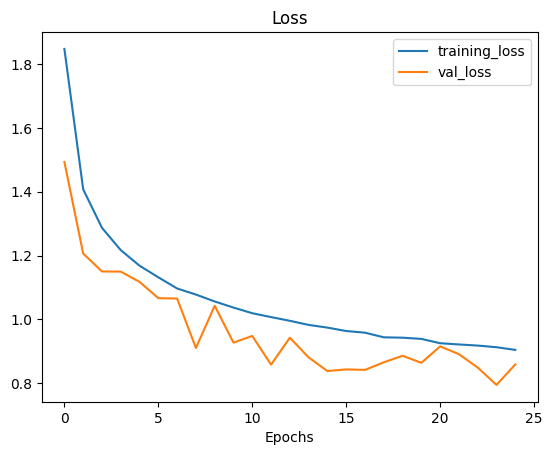

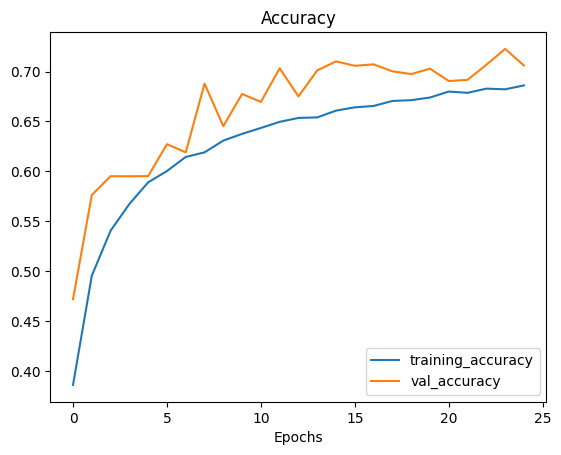

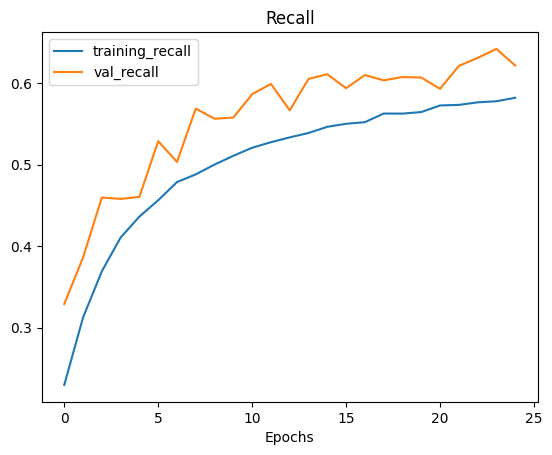

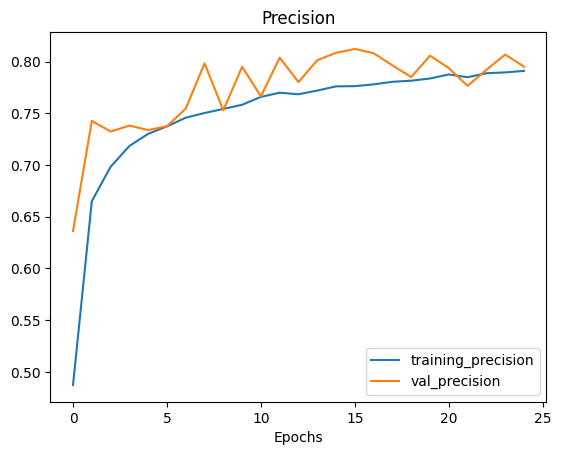

In [49]:
# Check out the loss curves
plot_loss_curves(history)

In [50]:
y_pred = model.predict(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [66]:
y_test = np.concatenate([y for x, y in test_data], axis=0)
y_test.argmax(axis=1)


2025-11-08 17:16:14.711111: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


array([0, 0, 0, ..., 9, 9, 9])

In [53]:
y_pred.argmax(axis=1).shape

(10000,)

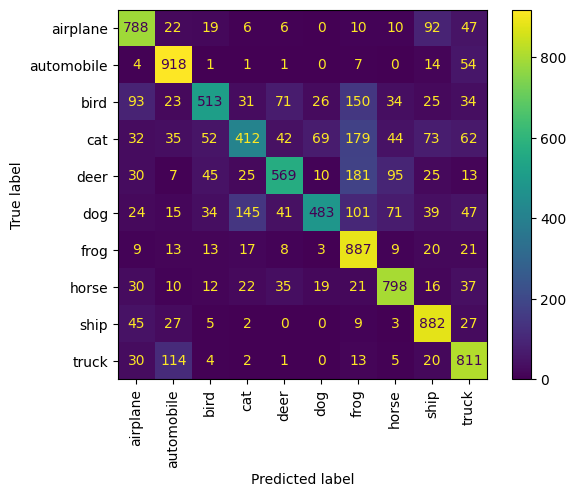

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

## Save the model for later use (i.e. deploying it to production, making predictions, grad-cam, etc)

After we have trained a model we can easily save it with `model.save()`

In [68]:
# Create the target directory if it doesn't already exist
os.makedirs('saved_models', exist_ok=True) 

# Save the model with the required .keras extension
model.save('saved_models/model_with_data_augmentation_layer.keras')

print("Model saved successfully!")

Model saved successfully!


In [69]:
# and we can load it easily with the load_model method
loaded_model = tf.keras.models.load_model('saved_models/model_with_data_augmentation_layer.keras')

/Users/constantinutner/exercise2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 42 variables whereas the saved optimizer has 4 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Users/constantinutner/exercise2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 38 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Good Luck (or well done!)

If you just read through everything, good luck with this lab! Otherwise, well done and please send it to your instructor.